# Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,0.001)

n = 7
m = 10
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp=np.zeros((n*m,3), np.float32)
objp[:,:2]=np.mgrid[0:n,0:m].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints=[] # 3d point in real world space
imgpoints=[] # 2d points in image plane.

images=glob.glob('../iphone/*.png')

In [3]:
for fname in images:
    img=cv2.imread(fname)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners=cv2.findChessboardCorners(gray, (n,m),None)

    # If found, add object points, image points (after refining them)
    if ret== True:
        objpoints.append(objp)
        
        corners2=cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img=cv2.drawChessboardCorners(img, (n,m), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
    
cv2.destroyAllWindows()

### Calibration

In [4]:
ret, mtx, dist, rvecs, tvecs=cv2.calibrateCamera(objpoints, imgpoints,
                                                 gray.shape[::-1],None,None)

In [5]:
img=cv2.imread('../iphone/sIMG_3538.png')
h, w=img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [6]:
# undistort
dst=cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h=roi
dst=dst[y:y+h, x:x+w]

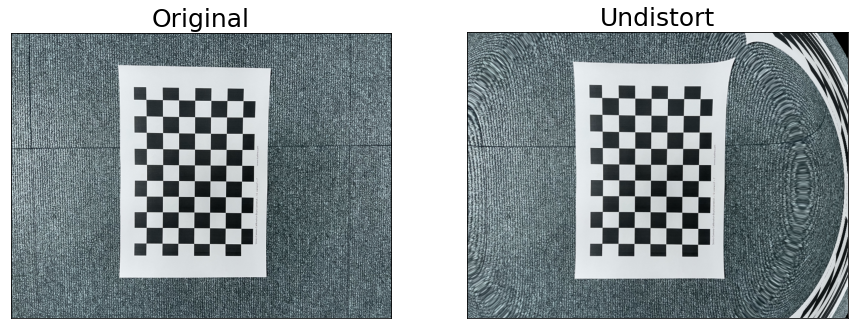

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Original', fontsize=25), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray')
plt.title('Undistort', fontsize=25), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# undistort
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst=cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
# crop the image
x,y,w,h=roi
dst=dst[y:y+h, x:x+w]

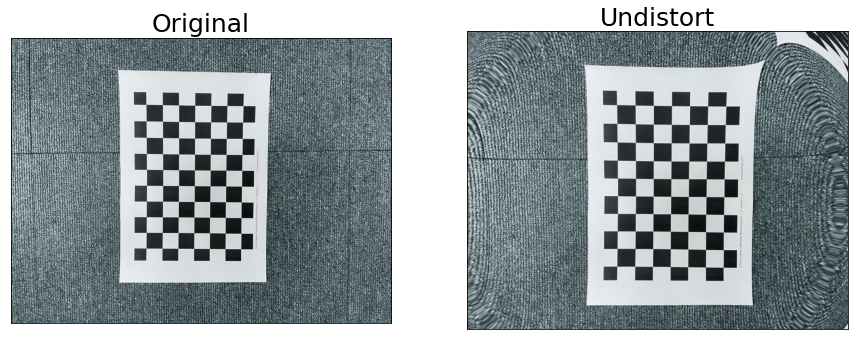

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Original', fontsize=25), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray')
plt.title('Undistort', fontsize=25), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
tot_error=0
for i in range(len(objpoints)):
    imgpoints2, _=cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error=cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error+=error
    
print("total error:", tot_error/len(objpoints))

total error: 0.07549839933231459
